In [1]:
import pandas as pd
#import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#from common.utils import load_data, mape

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [6]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_confirmed_global.csv')


In [7]:
dataf= pd.DataFrame(dataset)
col = list(dataset.columns.values)
col_value = (list(dataf.sum(axis = 0, skipna = True)))
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])
data = df1.drop(df1.index)
print(df1)

              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                         5603.37955
2               Lat                                        6057.329414
3              Long                                                557
4           1/22/20                                                655
..              ...                                                ...
719          1/6/22                                          303270379
720          1/7/22                                          305334730
721          1/8/22                                          307343166
722          1/9/22                                          310629511
723         1/10/22                                          313498180

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
col1 = list(df1.columns.values)
print(col1)
df1 = df1.drop(0) 
df1 = df1.drop(1) 
df1 = df1.drop(2) 
df1 = df1.drop(3) 
df1 = df1.drop(723) 
df1

['Title', 'Values']


,Title,Values
4,1/22/20,655
5,1/23/20,941
6,1/24/20,1434
7,1/25/20,2118
8,1/26/20,2927
...,...,...
718,1/5/22,300355562
719,1/6/22,303270379
720,1/7/22,305334730
721,1/8/22,307343166


In [9]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = df1['Title']
date_format = [pd.to_datetime(d) for d in dates]
date_time = [date_format[d].strftime("%d-%m-%Y") for d in range(719)]
#str_date_time = date_format[0].strftime("%d-%m-%Y %H:%M:%S")
#df1.set_index('Title',inplace=True)

In [10]:
#print(date_format)
#df1.set_index(date_time,inplace=True)
df1['Time'] = date_time
print(df1)

       Title     Values        Time
4    1/22/20        655  22-01-2020
5    1/23/20        941  23-01-2020
6    1/24/20       1434  24-01-2020
7    1/25/20       2118  25-01-2020
8    1/26/20       2927  26-01-2020
..       ...        ...         ...
718   1/5/22  300355562  05-01-2022
719   1/6/22  303270379  06-01-2022
720   1/7/22  305334730  07-01-2022
721   1/8/22  307343166  08-01-2022
722   1/9/22  310629511  09-01-2022

[719 rows x 3 columns]


In [11]:
df1.set_index('Time',inplace=True)

In [12]:
df1

,Title,Values
Time,,
22-01-2020,1/22/20,655
23-01-2020,1/23/20,941
24-01-2020,1/24/20,1434
25-01-2020,1/25/20,2118
26-01-2020,1/26/20,2927
...,...,...
05-01-2022,1/5/22,300355562
06-01-2022,1/6/22,303270379
07-01-2022,1/7/22,305334730


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   719 non-null    object
 1   Values  719 non-null    object
dtypes: object(2)
memory usage: 16.9+ KB


In [17]:
df1.index.freq='A'

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   719 non-null    object
 1   Values  719 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 16.9+ KB


In [19]:
df1["Values"] = df1["Values"].astype('int')

In [20]:
del df1['Title']

In [21]:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  719 non-null    int64
dtypes: int64(1)
memory usage: 11.2+ KB


In [22]:
df1.index.freq='B'

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  719 non-null    int64
dtypes: int64(1)
memory usage: 11.2+ KB


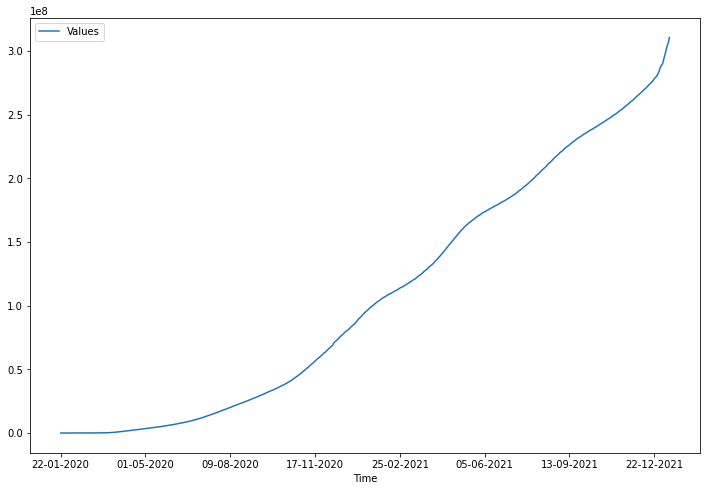

In [24]:
df1.plot(figsize=(12,8))

In [25]:
train = df1.iloc[:600]

In [26]:
test = df1.iloc[601:]

In [27]:
len(test)

118

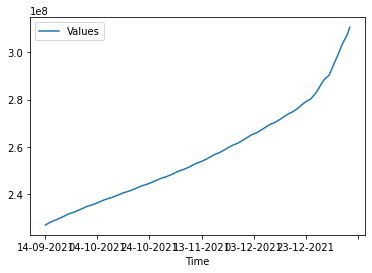

In [28]:
test.plot()

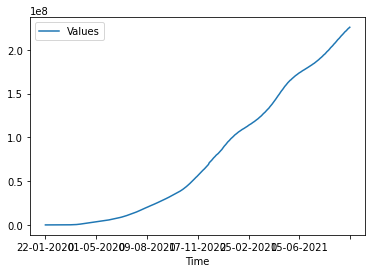

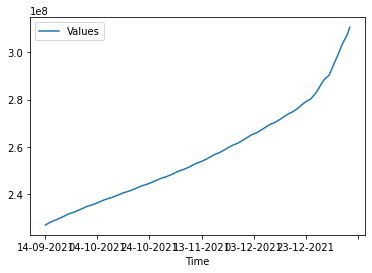

In [29]:
train.plot()
test.plot()

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
data = np.array(df1["Values"])

In [32]:
#np.asarray(data)

In [33]:
#data = train["Values"].astype('int')

In [34]:
#df1.index = pd.DatetimeIndex(df1.index).to_period('M')

In [35]:
#test.index = pd.DatetimeIndex(test.index).to_period('M')

In [36]:
#train.index = pd.DatetimeIndex(train.index).to_period('M')

In [37]:
model = ExponentialSmoothing(train['Values'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


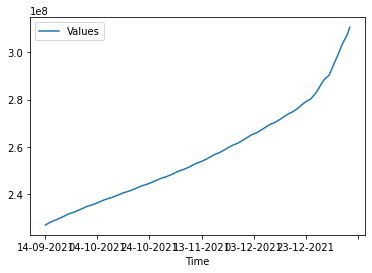

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


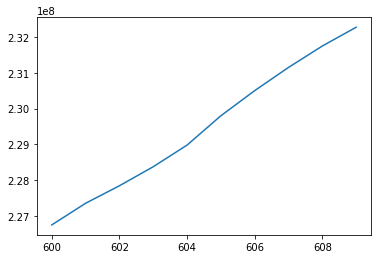

In [38]:
test.plot()
plt.show()
model.forecast(10).plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


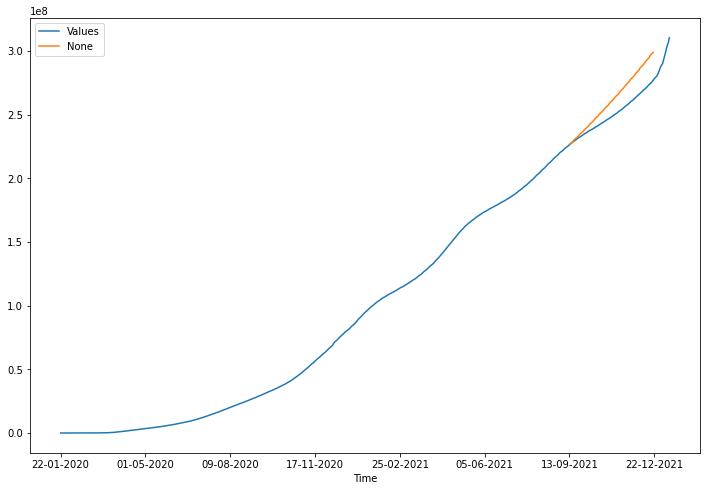

In [39]:
df1.plot(figsize=(12,8))
test_data = model.forecast(100).plot()
plt.legend()

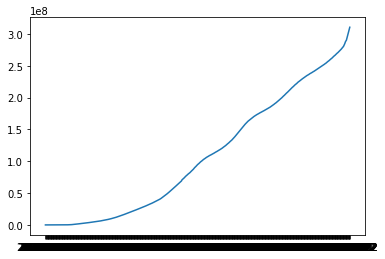

In [40]:
#today = datetime.date.today()
plt.figure()
plt.plot(df1.index,df1['Values'])

In [41]:
SimpleExpSmoothing(df1).fit(smoothing_level=0.1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
import plotly.express as px
fig = px.line(df1)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



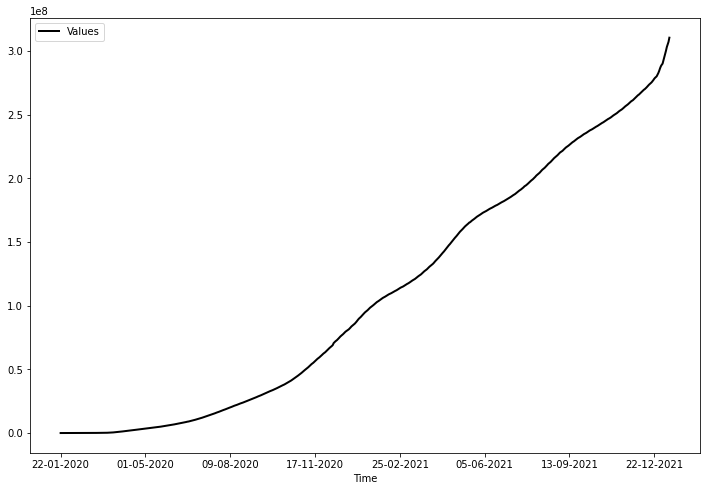

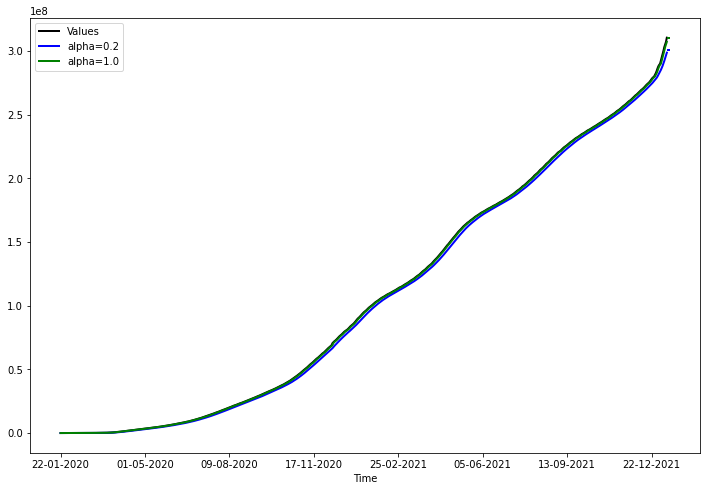

In [43]:
ax = df1.plot( color='black', figsize=(12,8), legend=True,linewidth=2)

#First Instance
ins1 = SimpleExpSmoothing(df1).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
#ins2 = SimpleExpSmoothing(df1).fit(smoothing_level=0.8,optimized=False)
#ins_cast2 = ins2.forecast(3).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(df1).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = df1.plot(color='black', figsize=(12,8), legend=True,linewidth=2)

#Plot for alpha =0.2
ins_cast1.plot( ax=ax, color='blue', legend=True,linewidth =2)
ins1.fittedvalues.plot( ax=ax, color='blue',linewidth = 2)

#Plot for alpha = 0.5
#ins_cast2.plot(ax=ax, color='red', legend=True,linewidth = 2)
#ins2.fittedvalues.plot(ax=ax, color='red',linewidth = 2)

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(ax=ax, color='green', legend=True,linewidth = 2)
ins3.fittedvalues.plot(ax=ax, color='green',linewidth = 2)

plt.show()